<a href="https://colab.research.google.com/github/bouattara/Machine-Learning-Projects/blob/main/Covid19_Cases_Prediction_Using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

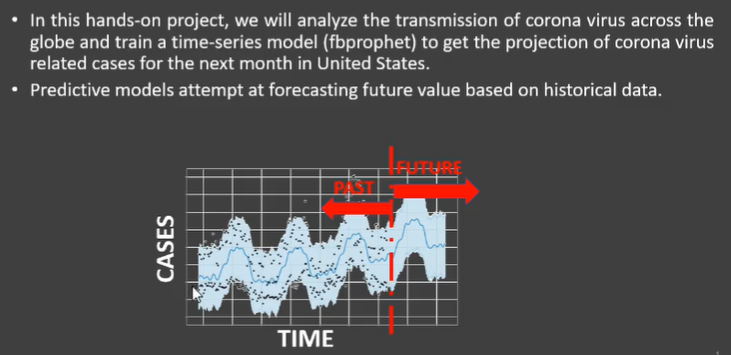

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [2]:
%pip install prophet

In [3]:
 !pip install plotly

In [4]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from prophet import Prophet
from sklearn.metrics import r2_score

In [5]:
#import data
# Entity: Country Name
# Date: Date on which records were observed
# Cases: Number of confirmed Covid-19 cases
# Deaths: Number of confirmed Covid-19 related deaths
# Daily tests: Number of tests taken in the country
# Iso_alpha: ISO code for countries
# Month: Month of observation



In [6]:
covid = pd.read_csv('covid_data.csv')

*MINI* CHALLENGE #1:
- Print the first and last 10 rows in the dataframe.
- How many samples exist in the dataframe?

In [7]:
covid.head()

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1,Mexico,2020-01-02,0.0,0.0,72.0,MEX,1
2,Mexico,2020-01-03,0.0,0.0,89.0,MEX,1
3,Thailand,2020-01-04,0.0,0.0,2.0,THA,1
4,Mexico,2020-01-04,0.0,0.0,45.0,MEX,1


In [8]:
covid.tail()
#this lets us see the number of samples in the data

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
20640,Saudi Arabia,2020-10-31,346880.0,5383.0,44840.0,SAU,10
20641,United States,2020-10-31,9047427.0,229708.0,1161427.0,USA,10
20642,South Africa,2020-10-31,723682.0,19230.0,22150.0,ZAF,10
20643,Malawi,2020-10-31,5923.0,184.0,0.0,MWI,10
20644,Pakistan,2020-10-31,332993.0,6806.0,21688.0,PAK,10


In [9]:
len(covid)
#this shows the total # observations in the data

20645

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [10]:
#getting null values
covid.isnull().sum()


Entity         0
Date           0
Cases          0
Deaths         0
Daily tests    0
iso_alpha      0
month          0
dtype: int64

In [11]:
#dataframe
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       20645 non-null  object 
 1   Date         20645 non-null  object 
 2   Cases        20645 non-null  float64
 3   Deaths       20645 non-null  float64
 4   Daily tests  20645 non-null  float64
 5   iso_alpha    20645 non-null  object 
 6   month        20645 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [12]:
# Statistical data of the dataframe
covid.describe()

,Cases,Deaths,Daily tests,month
count,2.064500e+04,20645.000000,2.064500e+04,20645.000000
mean,1.247184e+05,4693.475902,2.248130e+04,6.401259
std,6.068402e+05,17873.361923,1.055780e+05,2.399602
min,0.000000e+00,0.000000,-3.743000e+03,1.000000
25%,1.086000e+03,11.000000,9.700000e+01,4.000000
50%,8.698000e+03,196.000000,2.216000e+03,6.000000
75%,5.545200e+04,1522.000000,1.025400e+04,8.000000
max,9.047427e+06,229708.000000,1.492409e+06,10.000000


In [13]:
# Sort the dataframe by Date
covid = covid.sort_values(by="Date")
covid

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1,Mexico,2020-01-02,0.0,0.0,72.0,MEX,1
2,Mexico,2020-01-03,0.0,0.0,89.0,MEX,1
3,Thailand,2020-01-04,0.0,0.0,2.0,THA,1
4,Mexico,2020-01-04,0.0,0.0,45.0,MEX,1
...,...,...,...,...,...,...,...
20585,Australia,2020-10-31,27582.0,907.0,0.0,AUS,10
20584,India,2020-10-31,8137119.0,121641.0,1067976.0,IND,10
20583,New Zealand,2020-10-31,1601.0,25.0,4401.0,NZL,10
20591,France,2020-10-31,1331984.0,36565.0,175333.0,FRA,10


In [14]:
# Print the number of countries considered
covid.Entity.nunique()

83

In [15]:
covid.Entity.unique()

array(['Mexico', 'Thailand', 'Japan', 'United States', 'Vietnam',
       'Switzerland', 'Nepal', 'France', 'Australia', 'Malaysia',
       'Canada', 'Denmark', 'Israel', 'Czech Republic', 'Sri Lanka',
       'India', 'Philippines', 'Finland', 'Italy', 'Sweden',
       'United Kingdom', 'Belgium', 'South Africa', 'Guatemala', 'Iran',
       'Morocco', 'Kuwait', 'Bahrain', 'Norway', 'Oman', 'Iraq',
       'Austria', 'Croatia', 'Algeria', 'Pakistan', 'Romania', 'Greece',
       'Iceland', 'Serbia', 'New Zealand', 'Senegal', 'Nigeria',
       'Ireland', 'Ecuador', 'Portugal', 'Saudi Arabia',
       'Dominican Republic', 'Indonesia', 'Bangladesh', 'Jordan',
       'Tunisia', 'Chile', 'Poland', 'Togo', 'Libya', 'Slovenia',
       'Hungary', 'Peru', 'Costa Rica', 'Paraguay', 'Colombia',
       'Bulgaria', 'Panama', 'Bolivia', 'Jamaica', 'Turkey', 'Cuba',
       'Trinidad and Tobago', 'Ghana', 'Kenya', 'Ethiopia', 'Mauritania',
       'Namibia', 'Uruguay', 'Rwanda', 'Zambia', 'El Salvador',
  

In [16]:
# Print the name of Countries
#print('Countries on which have data are:\n')

for i in covid.Entity.unique():
      print(i+'\n')

Mexico

Thailand

Japan

United States

Vietnam

Switzerland

Nepal

France

Australia

Malaysia

Canada

Denmark

Israel

Czech Republic

Sri Lanka

India

Philippines

Finland

Italy

Sweden

United Kingdom

Belgium

South Africa

Guatemala

Iran

Morocco

Kuwait

Bahrain

Norway

Oman

Iraq

Austria

Croatia

Algeria

Pakistan

Romania

Greece

Iceland

Serbia

New Zealand

Senegal

Nigeria

Ireland

Ecuador

Portugal

Saudi Arabia

Dominican Republic

Indonesia

Bangladesh

Jordan

Tunisia

Chile

Poland

Togo

Libya

Slovenia

Hungary

Peru

Costa Rica

Paraguay

Colombia

Bulgaria

Panama

Bolivia

Jamaica

Turkey

Cuba

Trinidad and Tobago

Ghana

Kenya

Ethiopia

Mauritania

Namibia

Uruguay

Rwanda

Zambia

El Salvador

Madagascar

Zimbabwe

Uganda

Mozambique

Myanmar

Malawi



MINI CHALLENGE #2:
- Sort the DataFrame by 'Cases'

In [17]:
covid

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1,Mexico,2020-01-02,0.0,0.0,72.0,MEX,1
2,Mexico,2020-01-03,0.0,0.0,89.0,MEX,1
3,Thailand,2020-01-04,0.0,0.0,2.0,THA,1
4,Mexico,2020-01-04,0.0,0.0,45.0,MEX,1
...,...,...,...,...,...,...,...
20585,Australia,2020-10-31,27582.0,907.0,0.0,AUS,10
20584,India,2020-10-31,8137119.0,121641.0,1067976.0,IND,10
20583,New Zealand,2020-10-31,1601.0,25.0,4401.0,NZL,10
20591,France,2020-10-31,1331984.0,36565.0,175333.0,FRA,10


# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION - PART #1

In [18]:
# Function to plot interative plot plot
def interactive_plot(df, column_name, title):
    fig = px.line(title = title)
    for i in df['Entity'].unique():
        d = df[df['Entity']==i  ]
        fig.add_scatter(x = d['Date'], y = d[column_name], name = i)
    fig.show()

In [19]:
# Plot interactive chart

interactive_plot(covid, 'Cases', 'Number of Covid')

In [20]:
# Plot interactive chart
interactive_plot(covid, 'Daily tests', "Covid Daily Test")

In [21]:
interactive_plot(covid, 'Deaths', "Number of Deaths")


MINI CHALLENGE #3:
- Plot the number of deaths for all countries

# TASK #5: PERFORM INTERACTIVE DATA VISUALIZATION - PART #2

In [22]:
covid

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1,Mexico,2020-01-02,0.0,0.0,72.0,MEX,1
2,Mexico,2020-01-03,0.0,0.0,89.0,MEX,1
3,Thailand,2020-01-04,0.0,0.0,2.0,THA,1
4,Mexico,2020-01-04,0.0,0.0,45.0,MEX,1
...,...,...,...,...,...,...,...
20585,Australia,2020-10-31,27582.0,907.0,0.0,AUS,10
20584,India,2020-10-31,8137119.0,121641.0,1067976.0,IND,10
20583,New Zealand,2020-10-31,1601.0,25.0,4401.0,NZL,10
20591,France,2020-10-31,1331984.0,36565.0,175333.0,FRA,10


In [23]:
fig = px.choropleth(covid, locations = 'iso_alpha', color='Cases', animation_frame ='month')
fig.show()

In [24]:
# Covid deaths animation from January 2020 to November 2020
fig = px.choropleth(covid, locations = "iso_alpha", # locations iso code
                    color = 'Deaths', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation

fig.show()

In [25]:
# Covid testing animation from January 2020 to November 2020
fig = px.choropleth(covid, locations = "iso_alpha", # locations iso code
                    color = 'Daily tests', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation
fig.show()

MINI CHALLENGE #4:
- Annimate the number of cases plot based on Dates instead of months

In [26]:
covid

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
0,Mexico,2020-01-01,0.0,0.0,25.0,MEX,1
1,Mexico,2020-01-02,0.0,0.0,72.0,MEX,1
2,Mexico,2020-01-03,0.0,0.0,89.0,MEX,1
3,Thailand,2020-01-04,0.0,0.0,2.0,THA,1
4,Mexico,2020-01-04,0.0,0.0,45.0,MEX,1
...,...,...,...,...,...,...,...
20585,Australia,2020-10-31,27582.0,907.0,0.0,AUS,10
20584,India,2020-10-31,8137119.0,121641.0,1067976.0,IND,10
20583,New Zealand,2020-10-31,1601.0,25.0,4401.0,NZL,10
20591,France,2020-10-31,1331984.0,36565.0,175333.0,FRA,10


# TASK #6: PERPARE THE DATA TO FEED THE FBPROPHET MODEL

In [27]:
# We are going to focus on US data for the forcasting

# Get the data corresponding to the United States only

US_covid = covid[covid['Entity']=='United States']
US_covid

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
43,United States,2020-01-21,1.0,0.0,0.0,USA,1
47,United States,2020-01-22,1.0,0.0,0.0,USA,1
52,United States,2020-01-23,1.0,0.0,0.0,USA,1
59,United States,2020-01-24,1.0,0.0,0.0,USA,1
62,United States,2020-01-25,2.0,0.0,0.0,USA,1
...,...,...,...,...,...,...,...
20244,United States,2020-10-27,8704524.0,225735.0,1229458.0,USA,10
20368,United States,2020-10-28,8779653.0,226723.0,1355447.0,USA,10
20410,United States,2020-10-29,8858024.0,227700.0,1366664.0,USA,10
20489,United States,2020-10-30,8946154.0,228668.0,1414156.0,USA,10


In [28]:
# Only obtain the date and cases columns

US_covid = US_covid[['Date', 'Cases']]
US_covid

,Date,Cases
43,2020-01-21,1.0
47,2020-01-22,1.0
52,2020-01-23,1.0
59,2020-01-24,1.0
62,2020-01-25,2.0
...,...,...
20244,2020-10-27,8704524.0
20368,2020-10-28,8779653.0
20410,2020-10-29,8858024.0
20489,2020-10-30,8946154.0


In [29]:
# reset index

US_covid.reset_index(inplace=True, drop=True)

In [30]:
US_covid

,Date,Cases
0,2020-01-21,1.0
1,2020-01-22,1.0
2,2020-01-23,1.0
3,2020-01-24,1.0
4,2020-01-25,2.0
...,...,...
280,2020-10-27,8704524.0
281,2020-10-28,8779653.0
282,2020-10-29,8858024.0
283,2020-10-30,8946154.0


In [31]:
# These are the column names expected by fbprophet
US_covid.columns = ['ds', 'y']

In [32]:
US_covid

,ds,y
0,2020-01-21,1.0
1,2020-01-22,1.0
2,2020-01-23,1.0
3,2020-01-24,1.0
4,2020-01-25,2.0
...,...,...
280,2020-10-27,8704524.0
281,2020-10-28,8779653.0
282,2020-10-29,8858024.0
283,2020-10-30,8946154.0


In [33]:
# Split the data into testing and training datasets
train , test = US_covid[ US_covid['ds'] <= '2020-09-30'], US_covid[US_covid['ds'] >=  '2020-10-01']

In [34]:
train

,ds,y
0,2020-01-21,1.0
1,2020-01-22,1.0
2,2020-01-23,1.0
3,2020-01-24,1.0
4,2020-01-25,2.0
...,...,...
249,2020-09-26,7033430.0
250,2020-09-27,7078798.0
251,2020-09-28,7115046.0
252,2020-09-29,7148044.0


In [35]:
test

,ds,y
254,2020-10-01,7233043.0
255,2020-10-02,7277814.0
256,2020-10-03,7332285.0
257,2020-10-04,7382944.0
258,2020-10-05,7417845.0
259,2020-10-06,7458550.0
260,2020-10-07,7501612.0
261,2020-10-08,7549794.0
262,2020-10-09,7606594.0
263,2020-10-10,7664676.0


MINI CHALLENGE #5:
- Obtain the data for 'Canada' instead of 'United States'

In [36]:
Canada_covid = covid[covid['Entity']=='Canada']
Canada_covid

,Entity,Date,Cases,Deaths,Daily tests,iso_alpha,month
78,Canada,2020-01-26,1.0,0.0,0.0,CAN,1
80,Canada,2020-01-27,1.0,0.0,0.0,CAN,1
94,Canada,2020-01-28,2.0,0.0,0.0,CAN,1
115,Canada,2020-01-29,3.0,0.0,0.0,CAN,1
130,Canada,2020-01-30,3.0,0.0,0.0,CAN,1
...,...,...,...,...,...,...,...
20291,Canada,2020-10-27,220213.0,9973.0,80889.0,CAN,10
20392,Canada,2020-10-28,222887.0,10001.0,55672.0,CAN,10
20444,Canada,2020-10-29,225586.0,10032.0,63142.0,CAN,10
20556,Canada,2020-10-30,228542.0,10074.0,62843.0,CAN,10


# TASK #7: TRAIN THE FBPROPHET MODEL
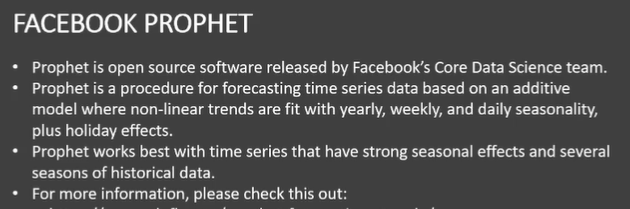

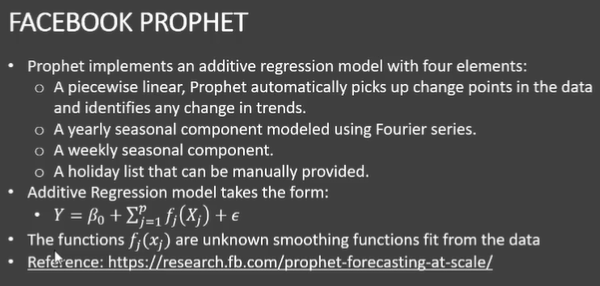

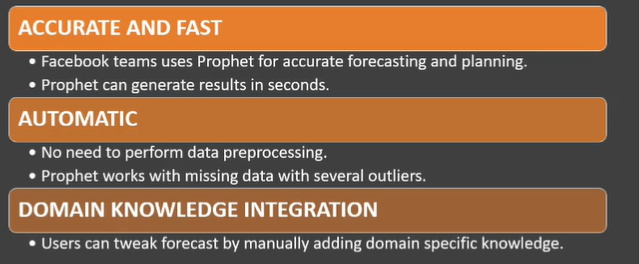

In [37]:
m = Prophet()

In [38]:
# Create and fit the prophet model to the training data
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkrk6z866/x4mgm9xc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkrk6z866/qqizs_ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16768', 'data', 'file=/tmp/tmpkrk6z866/x4mgm9xc.json', 'init=/tmp/tmpkrk6z866/qqizs_ky.json', 'output', 'file=/tmp/tmpkrk6z866/prophet_modelh_9xt4pq/prophet_model-20230924174909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
# We are going to forecast for 31 days, so we get the dataframe contain dates which includes our training
# dates as well as 31 days into the future, for forecasting.
future = m.make_future_dataframe(periods = 31)




In [40]:
# Make prediction
forecast = m.predict(future)
# 'yhat' is the mean predicted values and the 'yhat_lower' and 'yhat_upper' represent the lower and upper
# predicted boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
280,2020-10-27,8.301034e+06,8.143135e+06,8.461741e+06
281,2020-10-28,8.342192e+06,8.175144e+06,8.515509e+06
282,2020-10-29,8.383036e+06,8.210910e+06,8.566230e+06
283,2020-10-30,8.425277e+06,8.239806e+06,8.619394e+06
284,2020-10-31,8.469983e+06,8.269855e+06,8.673007e+06


In [41]:
from prophet.plot import plot_plotly, plot_components_plotly

# Ploting the forecasted data

plot_plotly(m, forecast)

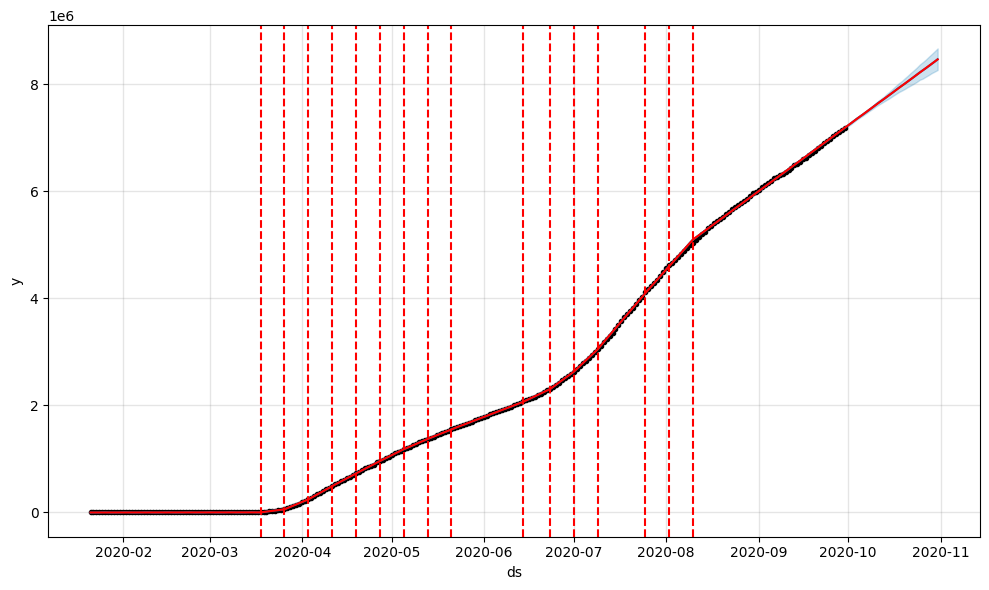

In [42]:
from prophet.plot import add_changepoints_to_plot

# This particular feature helps us identify trend changes that are infered by the model

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


MINI CHALLENGE #6:
- Try to perform forecast for the next 60 days instead of 30 days

In [43]:
future1 = m.make_future_dataframe(periods=60)

In [44]:
forecast1 = m.predict(future1)

In [45]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
309,2020-11-25,9.491299e+06,8.879441e+06,1.010655e+07
310,2020-11-26,9.532142e+06,8.909653e+06,1.015484e+07
311,2020-11-27,9.574384e+06,8.933301e+06,1.022351e+07
312,2020-11-28,9.619089e+06,8.959855e+06,1.029287e+07
313,2020-11-29,9.661361e+06,8.997119e+06,1.035270e+07


In [46]:
plot_plotly(m, forecast1)

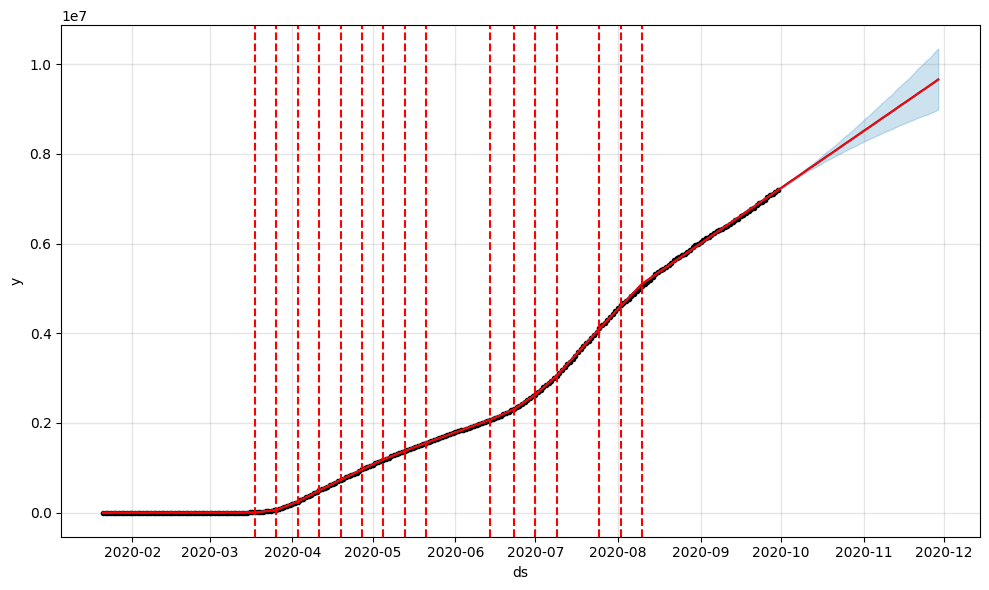

In [47]:
fig = m.plot(forecast1)
a = add_changepoints_to_plot(fig.gca(), m, forecast1)

# TASK #8: ASSESS THE PERFORMANCE OF THE MODEL

In [48]:
# Access the performance of the model

score = r2_score(test['y'], forecast[forecast['ds'] >= '2020-10-01']['trend'])

print('R-Sqaure score is {}'.format(score))

R-Sqaure score is 0.7807623474895817


In [49]:
# Add the predicted values to the original dataframe for plotting purpose

US_covid['predicted'] = forecast['trend']

In [50]:
US_covid

,ds,y,predicted
0,2020-01-21,1.0,3.993887e+00
1,2020-01-22,1.0,7.885416e+00
2,2020-01-23,1.0,1.177695e+01
3,2020-01-24,1.0,1.566847e+01
4,2020-01-25,2.0,1.956000e+01
...,...,...,...
280,2020-10-27,8704524.0,8.303109e+06
281,2020-10-28,8779653.0,8.344149e+06
282,2020-10-29,8858024.0,8.385188e+06
283,2020-10-30,8946154.0,8.426228e+06


In [51]:
# Function to plot the forecast and the origianl values for comparison

def interactive_plot_forecasting(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['ds'],y = df[i], name = i)
    fig.show()

In [52]:
interactive_plot_forecasting(US_covid, 'Original Vs Predicted')